<a href="https://colab.research.google.com/github/Wenypb/Simulacion/blob/main/Aguja_Bufon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias**

In [62]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math

*El **método de la aguja de Buffon** es un procedimiento probabilístico para aproximar el valor de pi ($\pi$)*

Imagina un plano con líneas paralelas equidistantes entre sí, separadas por una distancia
$d$.

Lanza agujas de longitud
$k$ sobre este plano de manera aleatoria.

Si una aguja de longitud
$k$ se lanza sobre el plano, la probabilidad de que cruce una línea (o al menos toque una línea) depende de la orientación de la aguja $a$ respecto a las líneas paralelas.

***1.- Parámetros:***


*   **d** -> Distancia entre las rectas que dividen el área donde caera la aguja.
(NOTA: Todas las lineas estan a la misma distancia)
*   **k** -> Tamaño de la aguja (k$\leq$d)



***2.- Variables:***

*  **m** -> Distancia que hay del punto medio de la aguja a la recta mas cercana. $0\leq m \leq d/2$
*  **a** -> Angulo que forma la aguja con las rectas verticales ($0\leq a \leq \frac{\pi}{2}$))



Tanto **m** como **a** son variables aleatorias distribuidas uniformemente, m entre $[0,\frac{d}{2}]$ y a entre $[0,\frac{\pi}{2}]$

***3.- Probabilidad***
La probabilidad de que la aguja cruce una linea recta es:

$P=\frac{2*k}{d*\pi}$ entonces si despejamos a $\pi$ de esta ecuacion tenemos el estimador

**Muestra del experimento con una aguja**

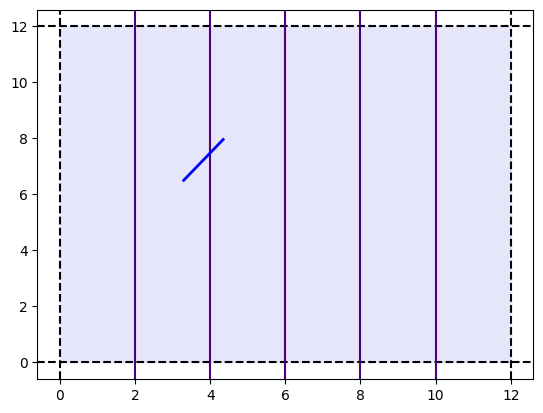

In [63]:
#MUESTRA DEL EXPERIMENTO
#-Graficar área
#---Crear lineas verticales
#------nlineas-> número de lineas verticales dentro del área
nlineas=5
#------dis-> Distancia entre lineas
dis=2
#------b-> Tamaño de la base del área
b=(nlineas+1)*dis
#------h-> Tamaño de la altura del área  (Se tomara del mismo tamaño de la base para que sea un cuadrado)
h=b
#Contornos del área
plt.axvline(0,color="black",linestyle="--")
plt.axvline(12,color="black",linestyle="--")
plt.axhline(0,color="black",linestyle="--")
plt.axhline(12,color="black",linestyle="--")
x = [0,0,b,b]
y = [0,h,b,0]
plt.fill(x,y,color="lavender")
for i in range(1,nlineas+1):
  plt.axvline(i*dis,color="indigo")

#-Generar  1 aguja
#------k-> Tamaño de la aguja(k<=d)
k=1.8
#---Generamos xc y yc que son las coordenadas del centro de la aguja x[0,12] y y[0,12]
xc=b*rnd.random()
yc=h*rnd.random()
#---Generamos a-> Angulo de la aguja con la linea vertical a[0,90]=a[0,pi/2]
a=(math.pi/2)*rnd.random()
#---Generamos linea de aguja
x1=xc-(k/2)*math.sin(math.pi/2-a)
x2=xc+(k/2)*math.sin(math.pi/2-a)
y1=yc-(k/2)*math.cos(math.pi/2-a)
y2=yc+(k/2)*math.cos(math.pi/2-a)
xs=[x1,x2]
ys=[y1,y2]
plt.plot(xs,ys,"blue",linewidth=2)
plt.show()



**Muestra del experimento con N agujas y calculo de los exitos obtenidos**

Obtuvimos 112 éxitos
Y la siguiente representacion gráfica:


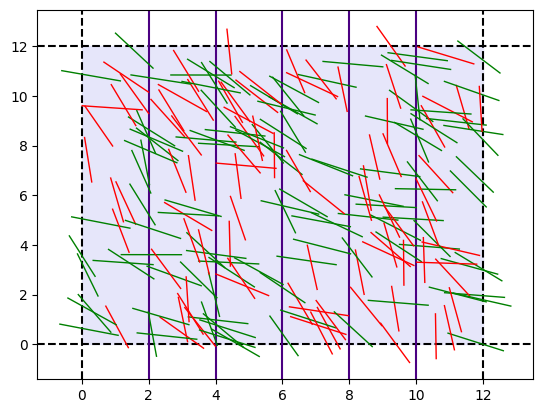

In [64]:
#Experimento con N intentos
N=200
#Contornos del área
plt.axvline(0,color="black",linestyle="--")
plt.axvline(12,color="black",linestyle="--")
plt.axhline(0,color="black",linestyle="--")
plt.axhline(12,color="black",linestyle="--")
x = [0,0,b,b]
y = [0,h,b,0]
plt.fill(x,y,color="lavender")
for i in range(1,nlineas+1):
  plt.axvline(i*dis,color="indigo")

#CICLO PARA REPETIR EL EXPERIMENTO N VECES
  # n -> NUMERO DE EXITOS
n=0
for i in range(N):
  #Generar 1 aguja
  xc=b*rnd.random()
  yc=h*rnd.random()
  a=(math.pi)*rnd.random()
  #L -> Distancia mas corta entre el centro de la aguja y las lineas verticales mas cercanas tanto por el lado derecho como del izquierdo
  if math.fmod(xc,2)>=1:
    L=2-math.fmod(xc,2)
  else:
    L=math.fmod(xc,2)
  if a<=(math.pi/2):
    x1=xc-(k/2)*math.sin(a)
    x2=xc+(k/2)*math.sin(a)
    y1=yc-(k/2)*(-math.cos(a))
    y2=yc+(k/2)*(-math.cos(a))
    dis_com=(k/2)*math.sin(a)
  else:
    x1=xc-(k/2)*math.sin(math.pi-a)
    x2=xc+(k/2)*math.sin(math.pi-a)
    y1=yc+(k/2)*(math.cos(math.pi-a))
    y2=yc-(k/2)*(math.cos(math.pi-a))
    dis_com=(k/2)*math.sin(math.pi-a)
  xs=[x1,x2]
  ys=[y1,y2]
  if L< dis_com:
    plt.plot(xs,ys,"green",linewidth=1)
    n=n+1
  else:
    plt.plot(xs,ys,"red",linewidth=1)
#Resultado:
print("Obtuvimos",n,"éxitos")
print("Y la siguiente representacion gráfica:")


**Cálculo del estimador pi**

$\pi \approx \frac{2*k}{d*P} $ donde P es la probabilidad de éxito.

Si P = $\frac{exitos}{intentos}$ entonces $\pi \approx \frac{2*k}{d*\frac{exitos}{intentos}} $

In [65]:
#CALCULO DEL ESTIMADOR: pi = 2*(k)/(dis*(exitos/intentos)
intentos=N
exitos=n
Estimador=2*(k)/(dis*(exitos/intentos))
print("Estimador = ",Estimador)

Estimador =  3.214285714285714


**Función para repetir el experimento con n intentos N veces**

In [66]:
def Funcion_pi_Agujas(N):
  #CICLO PARA REPETIR EL EXPERIMENTO N VECES
  # n -> NUMERO DE EXITOS
  n=0
  for i in range(N):
    #Generar 1 aguja
    xc=b*rnd.random()
    yc=h*rnd.random()
    a=(math.pi)*rnd.random()
    #L -> Distancia mas corta entre el centro de la aguja y las lineas verticales mas cercanas tanto por el lado derecho como del izquierdo
    if math.fmod(xc,2)>=1:
      L=2-math.fmod(xc,2)
    else:
      L=math.fmod(xc,2)
    if a<=(math.pi/2):
      x1=xc-(k/2)*math.sin(a)
      x2=xc+(k/2)*math.sin(a)
      y1=yc-(k/2)*(-math.cos(a))
      y2=yc+(k/2)*(-math.cos(a))
      dis_com=(k/2)*math.sin(a)
    else:
      x1=xc-(k/2)*math.sin(math.pi-a)
      x2=xc+(k/2)*math.sin(math.pi-a)
      y1=yc+(k/2)*(math.cos(math.pi-a))
      y2=yc-(k/2)*(math.cos(math.pi-a))
      dis_com=(k/2)*math.sin(math.pi-a)
    if L< dis_com:
      n=n+1
  return n

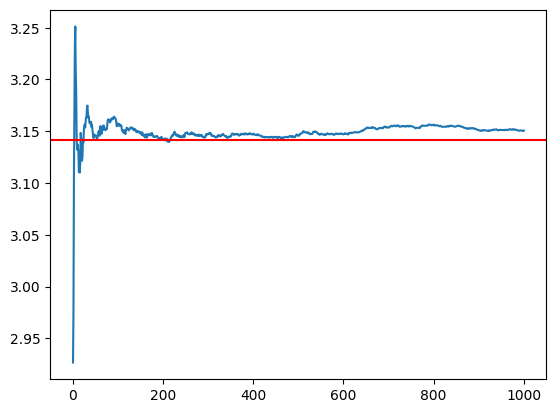

In [67]:
#Estimador con N repeticiones del experimento con n=25 intentos
suma=0
repeticiones=[]
promedios=[]
for i in range(1,1001):
  intentos=200
  exitos=Funcion_pi_Agujas(intentos)
  Estimador=2*(k)/(dis*(exitos/intentos))
  suma=suma+Estimador
  promedio=suma/(i)
  repeticiones.append(i)
  promedios.append(promedio)
#Grafica de los promedios
plt.plot(repeticiones,promedios)
#Linea del valor de pi
plt.axhline(np.pi,color="red")